#### Supervised Learning

In the world of Machine learning we come across multiple kind of data o work on , as an example let's talk about a data that's given to us are salary data of employees , and in the given data it's clearly mentioned that which column denotes the salary of the employees over there. So we can consider the salary to be labelled. Also in the data other points like employee designation , department , these points are also labelled. So this labelled data if we come across , the kind of machine learning algorithm we will apply over here can be identified as supervised learning.

##### Boston House Price Prediction - Supervised learning example

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [8]:
# loading the dataset
boston = pd.read_csv('BostonHousing.csv')

In [9]:
#checking the data
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [11]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [15]:
# in here our target variable for prediction is 'medv' or median value of the household
# we will do x,y seggregation now , in the x only features without target variable , means all data apart from medv column will be present
# in the y data only the medv column data will be present
x = boston.drop("medv",axis =1)
y = boston[['medv']] 

In [16]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [17]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


<AxesSubplot:xlabel='age', ylabel='medv'>

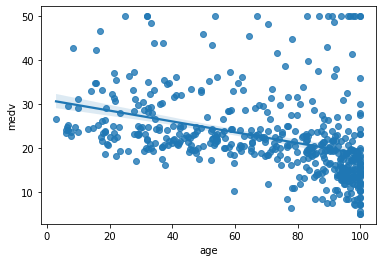

In [18]:
# visualizing my data on age and median value comparison
sns.regplot(x = boston['age'],y = boston['medv'])

In [19]:
# train test splitting of data with 80 , 20 ratio
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [21]:
print(f'training data shape for x {xtrain.shape}')
print(f'testing data shape for x {xtest.shape}')
print(f'training data shape for y {ytrain.shape}')
print(f'testing data shape for y {ytest.shape}')

training data shape for x (404, 13)
testing data shape for x (102, 13)
training data shape for y (404, 1)
testing data shape for y (102, 1)


In [22]:
# importing linear regression model and implementing the same
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [23]:
#fitting the model
model.fit(xtrain,ytrain)

LinearRegression()

In [24]:
# creating a preidtor variable as ypred , which will predict the xtest data
ypred = model.predict(xtest)

In [25]:
# checking our model based on two parameters
# firstly with mean squared error , this will compare ypred data with ytest data
from sklearn.metrics import mean_squared_error
print(mean_squared_error(ytest,ypred))


24.795970262424333


In [27]:
# Now checking our prediction with r2 score method , r2 score near to 1 ensures better model and prediction
from sklearn.metrics import r2_score
print(r2_score(ytest,ypred))

0.7351748338719721


In [30]:
# Now let's check the model score
model.score(xtest,ypred)

1.0

In [33]:
# Now let's try to predict a datapoint
model.predict([[0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98]])

d:\Anaconda\envs\github1\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[30.1359213]])